In [1]:
#############################################################################
############## BASIC PCA SAMPLE FOR THEORETICAL SESSION ##################### 

In [2]:
import numpy as np 
import pandas as pd

In [3]:
# Reading the Dataset

df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [5]:
# Scaling the values

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [6]:
# Computing Covariance Matrix

features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [7]:
# Computing Eigenvalues and Eigenvectors

values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [8]:
vectors[:5]

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [9]:
# Individual Principal Components
projected_1 = X_scaled.dot(vectors.T[0])
# print(vectors.T[2])

In [10]:
# Checkng for variation captured by each of the principal components
# values are your eigenvalues

explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))

print("Total explained variance by all eigenvectors : ", np.sum(explained_variances))
for i in range(len(values)):
    print("Total explained variance by PC" +str(i+1)+ " : ", explained_variances[i])

Total explained variance by all eigenvectors :  1.0000000000000002
Total explained variance by PC1 :  0.7277045209380135
Total explained variance by PC2 :  0.2303052326768065
Total explained variance by PC3 :  0.03683831957627379
Total explained variance by PC4 :  0.005151926808906321


In [11]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
projected_3 = X_scaled.dot(vectors.T[2])
y = df['species']
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['PC3'] = projected_3
res['Y'] = y
res.head()

,PC1,PC2,PC3,Y
0,-2.264542,-0.505704,-0.121943,setosa
1,-2.086426,0.655405,-0.227251,setosa
2,-2.367950,0.318477,0.051480,setosa
3,-2.304197,0.575368,0.098860,setosa
4,-2.388777,-0.674767,0.021428,setosa


In [12]:
# Visualizing only one principal component


# Only Principal Component 1
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(res['PC1'], [0] * len(res), hue=res['Y'], s=20)

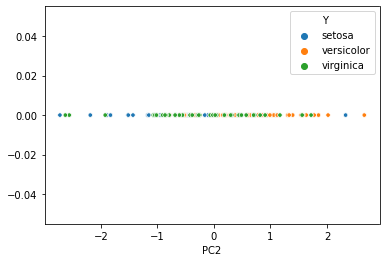

In [13]:
# Only Principal Component 2
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(res['PC2'], [0] * len(res), hue=res['Y'], s=20)

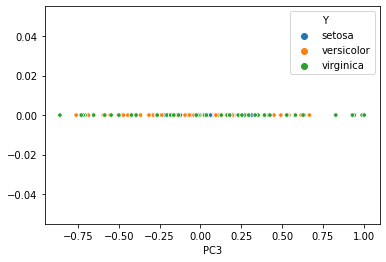

In [14]:
# Only Principal Component 3
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(res['PC3'], [0] * len(res), hue=res['Y'], s=20)

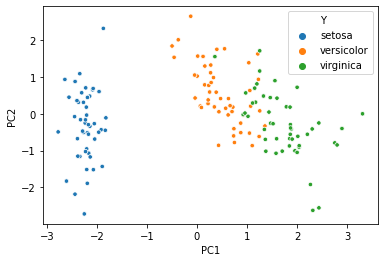

In [15]:
# Visualizing using two principal components

# Principal Component 1 and Principal Component 2 
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=20)

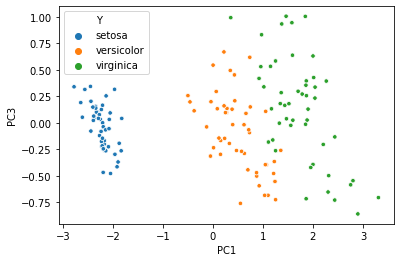

In [16]:
# Visualizing using two principal components

# Principal Component 1 and Principal Component 3 
sns.scatterplot(res['PC1'], res['PC3'], hue=res['Y'], s=20)

# -----------------CLASS DOUBT-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Someone mentioned that (PC1 and PC3) seems to be doing a better job than (PC1 and PC2)
# I would like to clarify that over here. An important point to note is that PCA is also primarily used as an unsupervised clustering technique.
# If you guys remember, this was mentioned in the introduction at the onset of why this session was supposed to happen later as the class has not covered unsupervised techniques yet.
# But for the sake of curiosity of those who do know about it, let us continue with that line of thought.
# Given that if we are using PCA for the purpose of unsupervised clustering, let us now have a look at the graphs.
# Note, as the name suggests in unsupervised techniques you would not be provided with the class labels. So consider the same graphs, only the points are now colorless. We were only so graciously able to color the datapoints because we had the information beforehand about the labels of each point. 
# So, if we imagine the datapoints colorless, we see that (PCA1 and PCA2) do a better job of showing that our dataset may contain just 3 clusters whereas (PCA1 and PCA3) give us the impression of more clusters than actually present as the points are more separated out.
# Since, we have the knowledge that this dataset has only 3 labels, since it's a supervised learning problem,  we can see that (PCA1 and PCA2) is doing a better job at representing the dataset.
# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

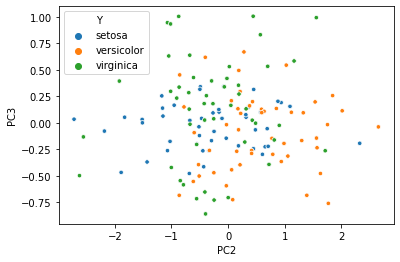

In [17]:
# Visualizing using two principal components

# Principal Component 2 and Principal Component 3 
sns.scatterplot(res['PC2'], res['PC3'], hue=res['Y'], s=20)